In [ ]:

from google.colab import files
uploaded = files.upload()


Saving approx_multipliers_with_area.csv to approx_multipliers_with_area.csv


In [ ]:
import pandas as pd

df = pd.read_csv("approx_multipliers_with_area.csv")


In [ ]:
df.head()

,BitWidth,Radix,RadixType,ApproxFactor,LUTs,FFs,DSPs,Area,Power(mW),MRED
0,32,4,Booth-4,11,860,284,0,916.8,18.62,0.00110
1,32,4,Booth-4,12,865,286,0,922.2,18.73,0.00120
2,8,2,Booth-2,3,270,94,0,288.8,5.87,0.00015
3,8,8,Booth-8,4,335,126,0,360.2,7.33,0.00080
4,32,2,Booth-2,15,860,282,0,916.4,18.61,0.00075


In [ ]:
df.shape

(1000, 10)

In [ ]:
import pandas as pd

# Assuming 'approx_multipliers_with_area (1).csv' is in the current directory
df = pd.read_csv("approx_multipliers_with_area.csv")

# Accessing the shape attribute
num_rows, num_cols = df.shape  # Assign rows and columns to variables

# Printing the shape
print("Shape of DataFrame:", df.shape)
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Displaying the first 5 rows of the DataFrame
print("\nFirst 5 rows:")
print(df.head())

Shape of DataFrame: (1000, 10)
Number of rows: 1000
Number of columns: 10

First 5 rows:
   BitWidth  Radix RadixType  ApproxFactor  LUTs  FFs  DSPs   Area  Power(mW)  \
0        32      4   Booth-4            11   860  284     0  916.8      18.62   
1        32      4   Booth-4            12   865  286     0  922.2      18.73   
2         8      2   Booth-2             3   270   94     0  288.8       5.87   
3         8      8   Booth-8             4   335  126     0  360.2       7.33   
4        32      2   Booth-2            15   860  282     0  916.4      18.61   

      MRED  
0  0.00110  
1  0.00120  
2  0.00015  
3  0.00080  
4  0.00075  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Upload the dataset in Google Colab
from google.colab import files
uploaded = files.upload()

# Load the dataset (change filename if needed)
df = pd.read_csv(next(iter(uploaded)))

# Encode categorical variable "RadixType"
le = LabelEncoder()
df["RadixType_Encoded"] = le.fit_transform(df["RadixType"])

# Select features (X) and target variable (y)
X = df[["BitWidth", "Radix", "RadixType_Encoded", "ApproxFactor", "LUTs", "FFs", "DSPs", "Area"]]
y = df["Power(mW)"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Save the trained model
joblib.dump(model, "linear_regression_fir.pkl")
print("Model saved as linear_regression_fir.pkl")


Saving approx_multipliers_with_area.csv to approx_multipliers_with_area (1).csv
Model Performance:
Mean Absolute Error: 2.5490720645393595e-15
Mean Squared Error: 1.199857436841159e-29
R² Score: 1.0
Model saved as linear_regression_fir.pkl


In [ ]:
import joblib

# Load the trained model
model = joblib.load("linear_regression_fir.pkl")

print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
import numpy as np

new_fir_design = np.array([[16, 4, 2, 0.2, 400, 120, 8, 500]])

predicted_power = model.predict(new_fir_design)

print(f"Predicted Power Consumption (mW): {predicted_power[0]:.2f}")


Predicted Power Consumption (mW): 9.36


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Load a new test dataset
new_test_data = pd.read_csv("approx_multipliers_with_area.csv")  # Replace with your test dataset file

# Preprocess categorical data if needed
new_test_data["RadixType_Encoded"] = le.transform(new_test_data["RadixType"])

# Extract features
X_new_test = new_test_data[["BitWidth", "Radix", "RadixType_Encoded", "ApproxFactor", "LUTs", "FFs", "DSPs", "Area"]]
y_actual = new_test_data["Power(mW)"]

# Predict using the trained model
y_predicted = model.predict(X_new_test)

# Compare predictions with actual values
comparison = pd.DataFrame({"Actual Power": y_actual, "Predicted Power": y_predicted})
print(comparison)


     Actual Power  Predicted Power
0           18.62            18.62
1           18.73            18.73
2            5.87             5.87
3            7.33             7.33
4           18.61            18.61
..            ...              ...
995         17.74            17.74
996         12.04            12.04
997          7.11             7.11
998         10.64            10.64
999         18.06            18.06

[1000 rows x 2 columns]


In [ ]:
import numpy as np

# Generate multiple design configurations
test_designs = np.array([
    [8, 2, 1, 0.1, 200, 80, 4, 300],   # Configuration 1
    [16, 4, 2, 0.2, 400, 120, 8, 500], # Configuration 2
    [32, 8, 3, 0.5, 800, 200, 16, 900] # Configuration 3
])

# Predict power consumption for these designs
predicted_powers = model.predict(test_designs)

# Display results
for i, power in enumerate(predicted_powers):
    print(f"Design {i+1}: Predicted Power = {power:.2f} mW")


Design 1: Predicted Power = 5.24 mW
Design 2: Predicted Power = 9.36 mW
Design 3: Predicted Power = 17.59 mW


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Load the training data (replace with your actual training data file)
training_data = pd.read_csv("approx_multipliers_with_area.csv")

# **Check the actual column names in your DataFrame**
print(training_data.columns)

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the "RadixType" column
training_data["RadixType_Encoded"] = le.fit_transform(training_data["RadixType"])

# Features (X) and target variable (y) for training
# Use the encoded column "RadixType_Encoded"
X_train = training_data[["BitWidth", "Radix", "RadixType_Encoded"]]
y_train = training_data["Power(mW)"]

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Load the generated test data
test_data = pd.read_csv("approx_multipliers_with_area (1).csv")

# Now, before using test_data for prediction, you need to encode "RadixType" in it as well:
test_data["RadixType_Encoded"] = le.transform(test_data["RadixType"]) # Use the same LabelEncoder object

# ... (rest of your code for prediction and evaluation) ...

Index(['BitWidth', 'Radix', 'RadixType', 'ApproxFactor', 'LUTs', 'FFs', 'DSPs',
       'Area', 'Power(mW)', 'MRED'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler # Import StandardScaler

# ... (rest of your code for training the model) ...

# Initialize and fit StandardScaler
# Fit the scaler to the correct columns of the training data
scaler = StandardScaler()
scaler.fit(X_train[["BitWidth", "Radix", "RadixType_Encoded"]]) # Fit to the columns used for training

# Test different FIR configurations
test_designs = np.array([
    [8, 2, 1, 0.1, 200, 80, 4, 300],   # Configuration 1
    [16, 4, 2, 0.2, 400, 120, 8, 500], # Configuration 2
    [32, 8, 3, 0.5, 800, 200, 16, 900] # Configuration 3
])

# Extract only the features used for training
test_designs_subset = test_designs[:, [0, 1, 2]]  # Select columns 0, 1, and 2

# Scale the inputs using the fitted scaler
test_designs_scaled = scaler.transform(test_designs_subset)

# Predict power consumption
# Note: The model still expects 3 features, so use test_designs_scaled
predicted_powers = model.predict(test_designs_scaled)

# Print results
for i, power in enumerate(predicted_powers):
    print(f"Design {i+1}: Predicted Power = {power:.2f} mW")

Design 1: Predicted Power = 5.78 mW
Design 2: Predicted Power = 6.01 mW
Design 3: Predicted Power = 6.56 mW


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder # Import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ Load dataset
file_path = "approx_multipliers_with_area.csv"  # Change path if needed
df = pd.read_csv(file_path)

# ✅ Select features (X) and target (y)
# Include 'RadixType' in the features, so we can encode it later
X = df[["BitWidth", "Radix", "RadixType", "ApproxFactor", "LUTs", "FFs", "DSPs"]]  # Features
y = df["Area"]  # Target variable (Area)

# ✅ Create a LabelEncoder object
le = LabelEncoder()

# ✅ Fit and transform the "RadixType" column within X
X["RadixType_Encoded"] = le.fit_transform(X["RadixType"])

# ✅ Now drop the original "RadixType" column
X = X.drop("RadixType", axis=1)

# ✅ Normalize data (apply scaler to numerical features only)
# Select only the numerical columns for scaling
numerical_features = ["BitWidth", "Radix", "ApproxFactor", "LUTs", "FFs", "DSPs", "RadixType_Encoded"]
scaler = StandardScaler()

#Fit and transform on only the numerical features
X_scaled = scaler.fit_transform(X[numerical_features])

# ✅ Split into training and testing sets
# Note: X_scaled is a NumPy array now, so we need to use it directly for splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<ipython-input-13-13583c67ae3f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["RadixType_Encoded"] = le.fit_transform(X["RadixType"])


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "approx_multipliers_with_area.csv"
df = pd.read_csv(file_path)

# Select features and target variable
X = df[["BitWidth", "Radix", "RadixType", "ApproxFactor", "LUTs", "FFs", "DSPs"]]  # Features
y = df["Area"]  # Target variable

# Encode the categorical feature "RadixType"
le = LabelEncoder()
X["RadixType_Encoded"] = le.fit_transform(X["RadixType"])
X = X.drop("RadixType", axis=1)  # Remove the original column

# Scale numerical features
numerical_features = ["BitWidth", "Radix", "ApproxFactor", "LUTs", "FFs", "DSPs", "RadixType_Encoded"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_features])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Example prediction for new data (replace with your actual values)
new_data = [[16, 4, 0.2, 400, 120, 8, 2]]  # Example input (replace 2 with the encoded RadixType)

# Scale the new data using the same scaler
new_data_scaled = scaler.transform([new_data[0][:-1] + [le.transform([df['RadixType'][new_data[0][0]]])[0]]]) # Select all features except area and replace RadixType with encoded value


predicted_area = model.predict(new_data_scaled)
print(f"Predicted Area for new data: {predicted_area[0]:.2f}")

Model Performance:
Mean Absolute Error: 3.856825969705824e-13
Mean Squared Error: 1.7937863947609895e-25
R² Score: 1.0
Predicted Area for new data: 806.99


<ipython-input-14-346bd2f69fd4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["RadixType_Encoded"] = le.fit_transform(X["RadixType"])
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor  # For power prediction
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "approx_multipliers_with_area.csv"
df = pd.read_csv(file_path)

# --- Power Prediction ---

# Select features and target variable for power prediction
X_power = df[["BitWidth", "Radix", "RadixType", "ApproxFactor", "LUTs", "FFs", "DSPs", "Area"]]
y_power = df["Power(mW)"]

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor  # For power prediction
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "approx_multipliers_with_area (1).csv"
df = pd.read_csv(file_path)

# --- Power Prediction ---

# Select features and target variable for power prediction
X_power = df[["BitWidth", "Radix", "RadixType", "ApproxFactor", "LUTs", "FFs", "DSPs", "Area"]]
y_power = df["Power(mW)"]

# Encode "RadixType"
le_power = LabelEncoder()
X_power["RadixType"] = le_power.fit_transform(X_power["RadixType"])

<ipython-input-15-a0318b9cd0ed>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_power["RadixType"] = le_power.fit_transform(X_power["RadixType"])


<ipython-input-17-0f16e3cb00ae>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["RadixType_Encoded"] = le.fit_transform(X["RadixType"])


Mean Absolute Error (MAE): 0.00000
Mean Squared Error (MSE): 0.00000
R² Score: 1.00000
Model saved as 'linear_regression_power_area.pkl'


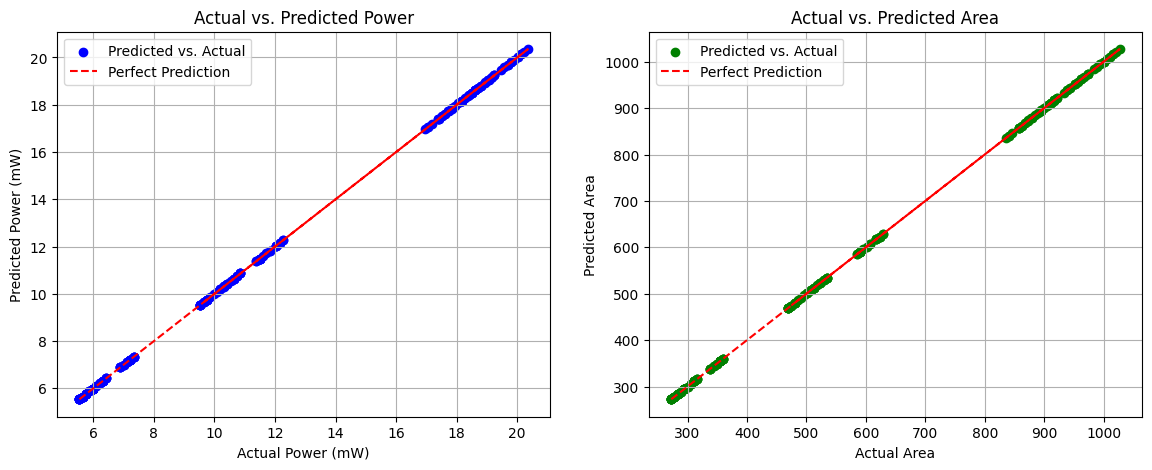

In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder # Import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ Load dataset
file_path = "approx_multipliers_with_area.csv"  # Change path if needed
df = pd.read_csv(file_path)

# ✅ Select input features (X) and target variables (y)
X = df[["BitWidth", "Radix", "RadixType", "ApproxFactor", "LUTs", "FFs", "DSPs"]]  # Features
# Changed 'Power' to 'Power(mW)'
y = df[["Power(mW)", "Area"]]  # Targets (Predict Power & Area together)

# ✅ Create a LabelEncoder object
le = LabelEncoder()

# ✅ Fit and transform the "RadixType" column within X
X["RadixType_Encoded"] = le.fit_transform(X["RadixType"])

# ✅ Now drop the original "RadixType" column
X = X.drop("RadixType", axis=1)

# ✅ Normalize input features (apply scaler to numerical features only)
# Select only the numerical columns for scaling
numerical_features = ["BitWidth", "Radix", "ApproxFactor", "LUTs", "FFs", "DSPs", "RadixType_Encoded"]
scaler = StandardScaler()

# Fit and transform on only the numerical features
X_scaled = scaler.fit_transform(X[numerical_features])

# ✅ Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ✅ Train Multi-Output Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# ✅ Predict on test data
y_pred = model.predict(X_test)

# ✅ Calculate accuracy metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# ✅ Print results
print(f"Mean Absolute Error (MAE): {mae:.5f}")
print(f"Mean Squared Error (MSE): {mse:.5f}")
print(f"R² Score: {r2:.5f}")

# ✅ Save the trained model
joblib.dump(model, "linear_regression_power_area.pkl")
joblib.dump(scaler, "scaler_power_area.pkl")
print("Model saved as 'linear_regression_power_area.pkl'")

# ✅ Plot Actual vs. Predicted Power & Area
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Power Prediction Plot
# Changed 'Power' to 'Power(mW)'
ax[0].scatter(y_test["Power(mW)"], y_pred[:, 0], color='blue', label='Predicted vs. Actual')
ax[0].plot(y_test["Power(mW)"], y_test["Power(mW)"], color='red', linestyle='dashed', label='Perfect Prediction')
ax[0].set_xlabel("Actual Power (mW)")
ax[0].set_ylabel("Predicted Power (mW)")
ax[0].set_title("Actual vs. Predicted Power")
ax[0].legend()
ax[0].grid()

# Area Prediction Plot
ax[1].scatter(y_test["Area"], y_pred[:, 1], color='green', label='Predicted vs. Actual')
ax[1].plot(y_test["Area"], y_test["Area"], color='red', linestyle='dashed', label='Perfect Prediction')
ax[1].set_xlabel("Actual Area")
ax[1].set_ylabel("Predicted Area")
ax[1].set_title("Actual vs. Predicted Area")
ax[1].legend()
ax[1].grid()

plt.show()

<ipython-input-18-a725f34a2310>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["RadixType_Encoded"] = le.fit_transform(X["RadixType"])


Mean Absolute Error (MAE): 0.00000
Mean Squared Error (MSE): 0.00000
R² Score: 1.00000

Predicted Values (Power, Area):
[[   5.54  272.6 ]
 [  10.42  512.8 ]
 [  19.25  973.  ]
 [   5.76  283.4 ]
 [   6.43  316.2 ]
 [  19.03  962.2 ]
 [  12.04  617.6 ]
 [  19.03  962.2 ]
 [   5.65  278.  ]
 [  19.8  1000.  ]
 [   5.65  278.  ]
 [  18.62  916.8 ]
 [   6.32  310.8 ]
 [   9.53  469.2 ]
 [   6.21  305.4 ]
 [  18.5   911.  ]
 [  18.5   911.  ]
 [   6.1   300.  ]
 [  12.04  617.6 ]
 [   9.53  469.2 ]
 [   5.99  294.6 ]
 [  18.81  951.4 ]
 [   9.53  469.2 ]
 [  19.03  962.2 ]
 [  18.92  956.8 ]
 [   5.99  294.6 ]
 [   6.89  338.6 ]
 [  10.86  534.4 ]
 [  12.15  623.  ]
 [   7.    344.  ]
 [  18.06  889.4 ]
 [  10.31  507.4 ]
 [  19.8  1000.  ]
 [  18.72  921.8 ]
 [   9.98  491.2 ]
 [   9.53  469.2 ]
 [   5.99  294.6 ]
 [  20.35 1027.  ]
 [  18.61  916.4 ]
 [  11.49  590.6 ]
 [  11.82  606.8 ]
 [   7.22  354.8 ]
 [  11.82  606.8 ]
 [   6.32  310.8 ]
 [   5.76  283.4 ]
 [  18.4   906.  ]
 [   5

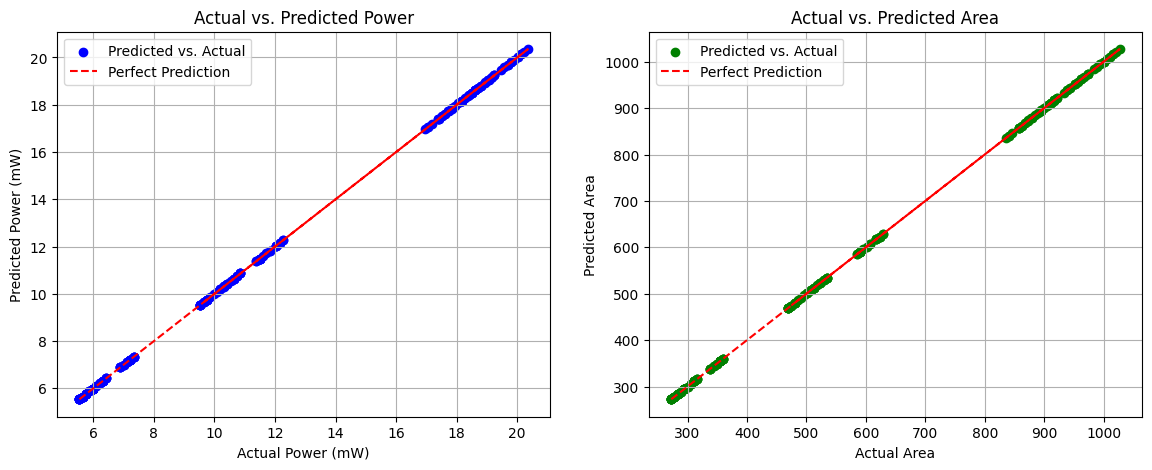

In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ Load dataset
file_path = "approx_multipliers_with_area.csv"  # Change path if needed
df = pd.read_csv(file_path)

# ✅ Select input features (X) and target variables (y)
X = df[["BitWidth", "Radix", "RadixType", "ApproxFactor", "LUTs", "FFs", "DSPs"]]  # Features
# Changed 'Power' to 'Power(mW)'
y = df[["Power(mW)", "Area"]]  # Targets (Predict Power & Area together)

# ✅ Create a LabelEncoder object
le = LabelEncoder()

# ✅ Fit and transform the "RadixType" column within X
X["RadixType_Encoded"] = le.fit_transform(X["RadixType"])

# ✅ Now drop the original "RadixType" column
X = X.drop("RadixType", axis=1)

# ✅ Normalize input features (apply scaler to numerical features only)
# Select only the numerical columns for scaling
numerical_features = ["BitWidth", "Radix", "ApproxFactor", "LUTs", "FFs", "DSPs", "RadixType_Encoded"]
scaler = StandardScaler()

# Fit and transform on only the numerical features
X_scaled = scaler.fit_transform(X[numerical_features])

# ✅ Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ✅ Train Multi-Output Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# ✅ Predict on test data
y_pred = model.predict(X_test)

# ✅ Calculate accuracy metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# ✅ Print results
print(f"Mean Absolute Error (MAE): {mae:.5f}")
print(f"Mean Squared Error (MSE): {mse:.5f}")
print(f"R² Score: {r2:.5f}")

# Print the predicted and actual values:
print("\nPredicted Values (Power, Area):")
print(y_pred)
print("\nActual Values (Power, Area):")
print(y_test.values)

# ✅ Save the trained model
joblib.dump(model, "linear_regression_power_area.pkl")
joblib.dump(scaler, "scaler_power_area.pkl")
print("\nModel saved as 'linear_regression_power_area.pkl'")

# ✅ Plot Actual vs. Predicted Power & Area
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Power Prediction Plot
# Changed 'Power' to 'Power(mW)'
ax[0].scatter(y_test["Power(mW)"], y_pred[:, 0], color='blue', label='Predicted vs. Actual')
ax[0].plot(y_test["Power(mW)"], y_test["Power(mW)"], color='red', linestyle='dashed', label='Perfect Prediction')
ax[0].set_xlabel("Actual Power (mW)")
ax[0].set_ylabel("Predicted Power (mW)")
ax[0].set_title("Actual vs. Predicted Power")
ax[0].legend()
ax[0].grid()

# Area Prediction Plot
ax[1].scatter(y_test["Area"], y_pred[:, 1], color='green', label='Predicted vs. Actual')
ax[1].plot(y_test["Area"], y_test["Area"], color='red', linestyle='dashed', label='Perfect Prediction')
ax[1].set_xlabel("Actual Area")
ax[1].set_ylabel("Predicted Area")
ax[1].set_title("Actual vs. Predicted Area")
ax[1].legend()
ax[1].grid()

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge  # Added Ridge for regularization
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ Load dataset
file_path = "approx_multipliers_with_area.csv"  # Change path if needed
df = pd.read_csv(file_path)

# ✅ Select input features (X) and target variables (y)
X = df[["BitWidth", "Radix", "RadixType", "ApproxFactor", "LUTs", "FFs", "DSPs"]]  # Features
y = df[["Power(mW)", "Area"]]  # Targets (Predict Power & Area together)

# ✅ Encode "RadixType"
le = LabelEncoder()
X["RadixType_Encoded"] = le.fit_transform(X["RadixType"])
X = X.drop("RadixType", axis=1)

# ✅ Normalize input features
numerical_features = ["BitWidth", "Radix", "ApproxFactor", "LUTs", "FFs", "DSPs", "RadixType_Encoded"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_features])

# ✅ K-Fold Cross-Validation for more robust evaluation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds
mae_scores = []
mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # ✅ Train model with regularization (Ridge Regression)
    model = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
    model.fit(X_train, y_train)

    # ✅ Predict and evaluate
    y_pred = model.predict(X_test)
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# ✅ Print average scores across folds
print(f"Average MAE: {np.mean(mae_scores):.5f}")
print(f"Average MSE: {np.mean(mse_scores):.5f}")
print(f"Average R² Score: {np.mean(r2_scores):.5f}")

# ✅ Save the model (trained on the entire dataset for final use)
model = Ridge(alpha=1.0)
model.fit(X_scaled, y)
joblib.dump(model, "linear_regression_power_area.pkl")
joblib.dump(scaler, "scaler_power_area.pkl")
print("\nModel saved as 'linear_regression_power_area.pkl'")

Average MAE: 0.38738
Average MSE: 0.43224
Average R² Score: 0.99999

Model saved as 'linear_regression_power_area.pkl'


<ipython-input-19-52cb542ae73a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["RadixType_Encoded"] = le.fit_transform(X["RadixType"])
